# PCA

Principal Component Analysis (PCA) is an indispensable tool for visualization and dimensionality reduction for data science but is often buried in complicated math.

### What is PCA?

Principal component analysis (PCA) is a technique that transforms high-dimensions data into lower-dimensions while retaining as much information as possible.

PCA is extremely useful when working with data sets that have a lot of features. Common applications such as image processing, genome research always have to deal with thousands-, if not tens of thousands of columns.

### How does PCA work?



Can PCA understand which part of our data is important?
Can we mathematically quantify the amount of information embedded within the data?

Well, variance can.The greater the variance, the more the information. Vice versa.

variance measures the average degree to which each point differs from the mean.

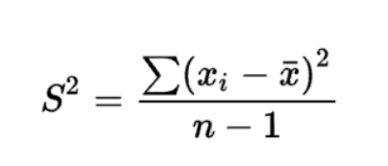

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img

plt.figure(figsize=(6, 5), dpi=80)
image = img.imread('1.png')
plt.axis('off')
plt.imshow(image)
plt.show()

### PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.



## n-D to 1-D

Suppose that we want to project our n-D data on a line :

#### Best Line Approximation: We will start with r = 1, that is, the one-dimensional subspace or line ,u that best approximates D in terms of the variance of the projected points

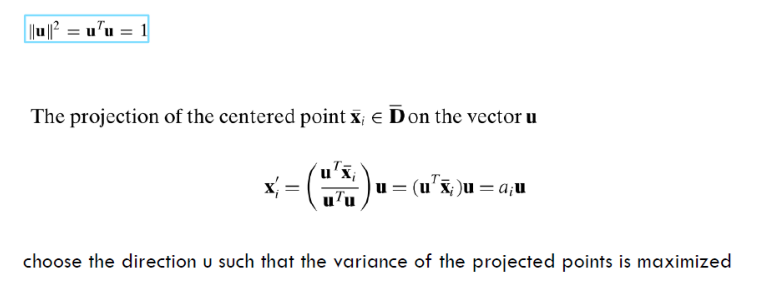

In [2]:
plt.figure(figsize=(12, 10), dpi=80)
image = img.imread('2.png')
plt.axis('off')
plt.imshow(image)
plt.show()

#### In the eyes of PCA, variance is an objective and mathematical way to quantify the amount of information in our data.Variance is information.

So we are looking for u which ais' has maximum variance:


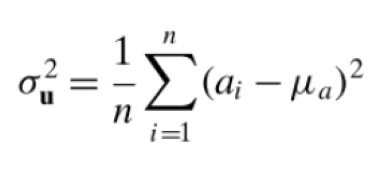

In [3]:
plt.figure(figsize=(6, 4), dpi=80)
image = img.imread('3.png')
plt.axis('off')
plt.imshow(image)
plt.show()

So we need ai bar and we know where ai comes from:

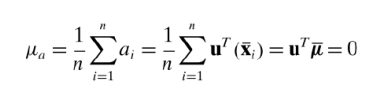

In [4]:
plt.figure(figsize=(6, 4), dpi=80)
image = img.imread('4.png')
plt.axis('off')
plt.imshow(image)
plt.show()

as we know we have set average of xi equal to zero and because of that we get zero too, as a result :

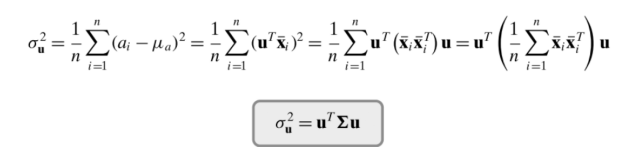

In [5]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('5.png')
plt.axis('off')
plt.imshow(image)
plt.show()

in this formula Xi bar is a nx1 matrix and xi bar traverse is a 1xn matrix so we have of nxn matrices summation dividing into number of them,this summation gives us an estimate of the covariance matrix:

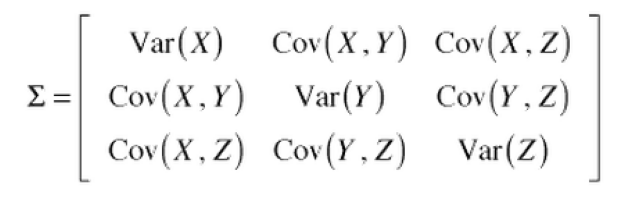

In [6]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('6.png')
plt.axis('off')
plt.imshow(image)
plt.show()

The covariance matrix provides a useful tool for separating the structured relationships in a matrix of random variables. This can be used to decorrelate variables or applied as a transform to other variables. 

So here we have two condition to choose u :
- Maximizing ai's variance
- ||u|| = 1

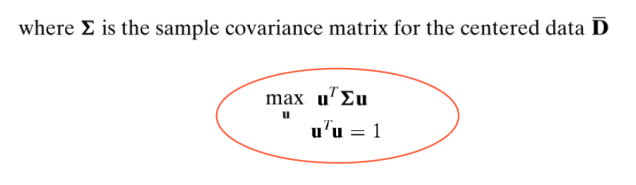

In [7]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('7.png')
plt.axis('off')
plt.imshow(image)
plt.show()

For this condition we know there is a answer which can be found as __eigenvector of the largest eigenvalue of sigma matrix__

we have explained PCA based on variance but it can be explained with minimuam squared error:

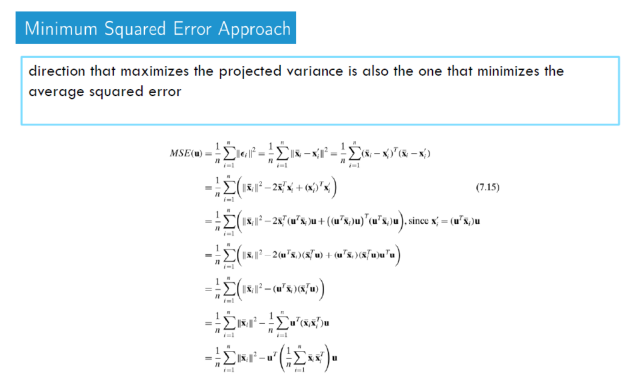

In [8]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('8.png')
plt.axis('off')
plt.imshow(image)
plt.show()

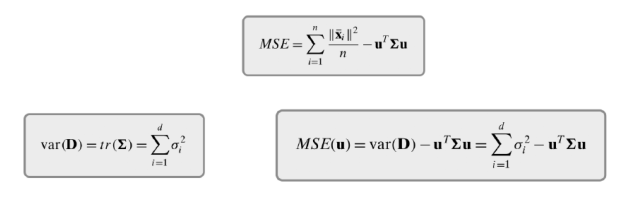

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('9.png')
plt.axis('off')
plt.imshow(image)
plt.show()

if we want minimuam MSE we need uTsigmau to be maximum just like previous explaination

### n-D to 2-D :

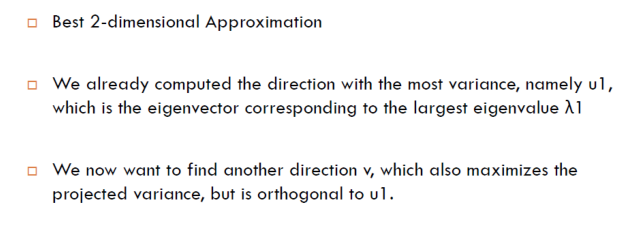

In [10]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('10.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In order to find u2 we should do the samething we did with u1 but there is one more condition , we should not choose the same u again !

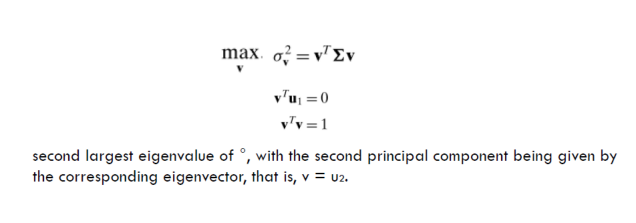

In [11]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('11.png')
plt.axis('off')
plt.imshow(image)
plt.show()

there is an answer for this situation too, __eigenvector of second largest eigenvalue of sigma matrix__

So in order to project data on any dimension :

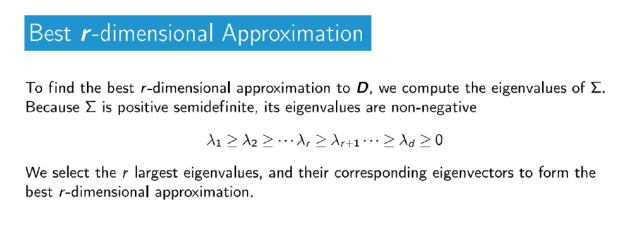

In [12]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('12.png')
plt.axis('off')
plt.imshow(image)
plt.show()

## PCA algorithm :

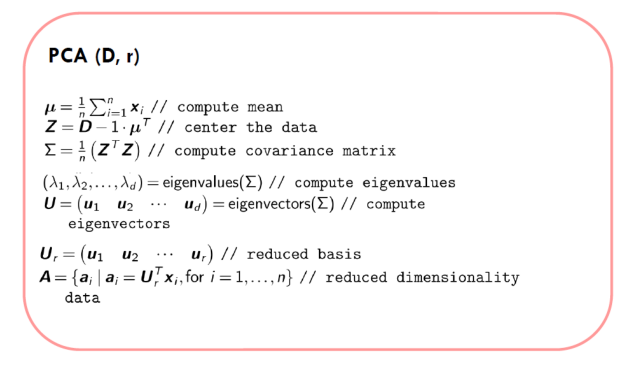

In [13]:
plt.figure(figsize=(10, 8), dpi=80)
image = img.imread('13.png')
plt.axis('off')
plt.imshow(image)
plt.show()

When it comes to real data, more often than not, we won’t get a principal component that captures 100% of the variances. Performing a PCA will give us N number of principal components, where N is equal to the dimensionality of our original data. From this list of principal components, we generally choose the least number of principal components that would explain the most amount of our original data

To sum it all up, reducing dimensions with PCA changes the distances of our data. It does so in a way that preserves large pairwise distance better than small pairwise distance.

This is one of the few drawbacks of reducing dimensions with PCA and we need to be aware of that, especially when working with Euclidean distance-based algorithm.

Sometimes, it may be more beneficial to run your algorithm on the original data instead.

# Implementation :

In [14]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
# Create an array with 3 clusters in 3-dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Standardize the data
X = StandardScaler().fit_transform(X)

# Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

x0        x1        x2  cluster_label
0 -0.366353  1.022466  1.166899              2
1 -1.179214  1.318905  1.047407              2
2  0.346441 -1.360488 -0.417740              1
3  0.507115  0.055279 -0.890964              0
4 -0.185192  0.937566  0.930304              2

Our toy data set has 3 variables — x0, x1, and x2 and they are distributed in a way that clumps together in 3 different clusters. The “cluster_label” tells us which cluster the data point belongs to.

In [16]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x0', y='x1', z='x2', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

The data seems ready for PCA. We’re going to try and reduce its dimensionality. Fortunately, Sklearn made PCA very easy to execute. Even though it took us over 2000 words to explain PCA, we only needed 3 lines to run it.

In [17]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

There are a couple of moving parts here. When we fit our data to Sklearn’s PCA function, it does all of the heavy liftings to return us a PCA model and the transformed data.

The model gives us access to multitudes of attributes such as eigenvalues, eigenvectors, mean of original data, variance explained, and the list goes on. These are incredibly insightful if we want to understand what the PCA has done with our data.

One attribute I’d like to highlight is the pca.explained_variance_ratio_ which tells us the proportion of variance explained by each principal component. We could visualize this with a Scree Plot.

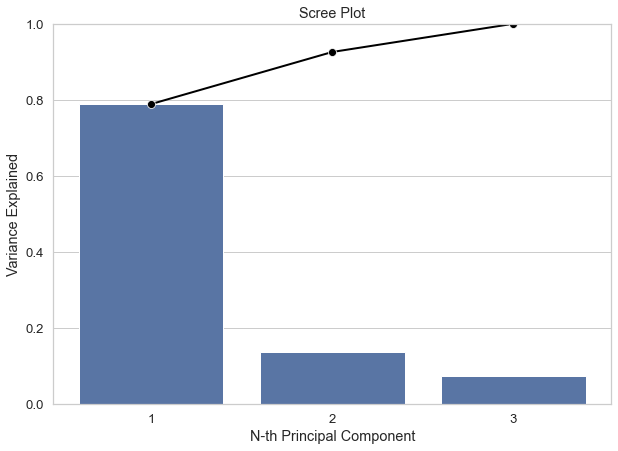

In [18]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

The chart informs us that using 2 principal components instead of 3 is fine because they can capture 90%+ of the variance.

On top of that, we can also look at the combinations of variables that created each principal component with pca.components_**2. We could use a heat map to showcase this.

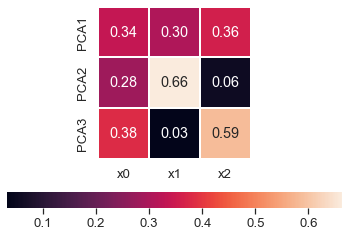

In [19]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In our example, we can see that PCA1 is made from 34% of x0, 30% of x1, and 36% of x2. PCA2 is primarily dominated by x1.


Now that we understand the principal components a little bit better, we can make a final decision on the number of principal components we want to keep. In this case, I feel that 2 principal components are sufficient.

So, we can re-run the PCA model, but this time with the n_components=2 argument, which tells the PCA to keep only the top 2 principal components for us.

In [20]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

PC1       PC2  label
0  1.750435 -0.041716      2
1  2.255957 -0.226133      2
2 -1.058243  0.998596      1
3 -1.165212 -0.799110      0
4  1.478118 -0.034766      2

This will return us a DataFrame with the first two principal components. Finally, we can plot a scatterplot to visualize our data.

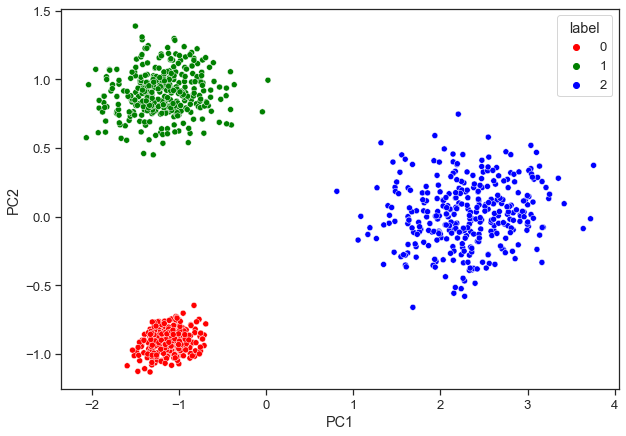

In [21]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])

#### Sources :
- https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d#:~:text=PCA%20is%20defined%20as%20an,second%20coordinate%2C%20and%20so%20on.